In [2]:
!pip install pandas

In [10]:
!pip install seaborn

In [3]:
import pandas as pd
df = pd.read_csv("data/Education.csv")
df.head()


,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,1993,Female,Not applicable,Number,1034842
1,Afghanistan,1993,All genders,Not applicable,Number,1801311
2,Afghanistan,1993,Male,Not applicable,Number,766469
3,Albania,2014,All genders,Not applicable,Number,7097
4,Albania,2013,All genders,Not applicable,Number,7543


In [4]:
# Check how many missing values are in each column
df.isnull().sum()

Reference Area          0
Time Period             0
Sex                     0
Age group               0
Units of measurement    0
Observation Value       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

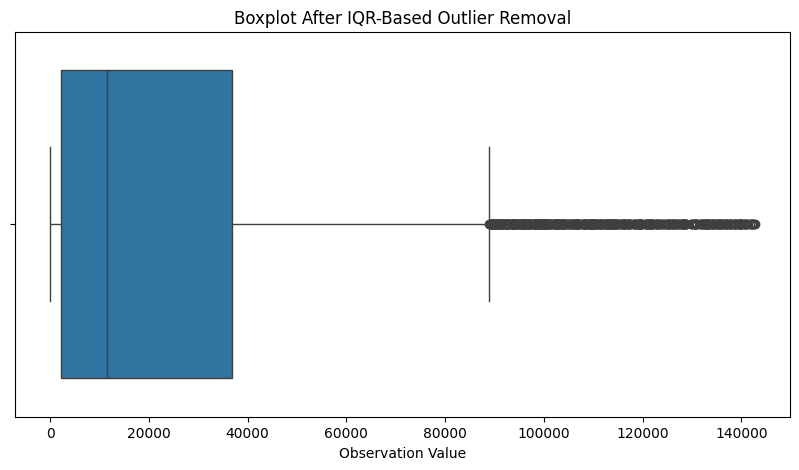

In [15]:
# Calculate Q1 and Q3
Q1 = df['Observation Value'].quantile(0.25)
Q3 = df['Observation Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset using the bounds
df = df[(df['Observation Value'] >= lower_bound) & (df['Observation Value'] <= upper_bound)]

# Show new boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Observation Value'])
plt.title("Boxplot After IQR-Based Outlier Removal")
plt.show()


In [16]:
df.describe()

,Time Period,Observation Value
count,7173.000000,7173.000000
mean,1998.541336,25820.368186
std,11.301939,32724.398554
min,1975.000000,0.000000
25%,1989.000000,2235.000000
50%,2001.000000,11596.000000
75%,2008.000000,36892.000000
max,2015.000000,142680.000000


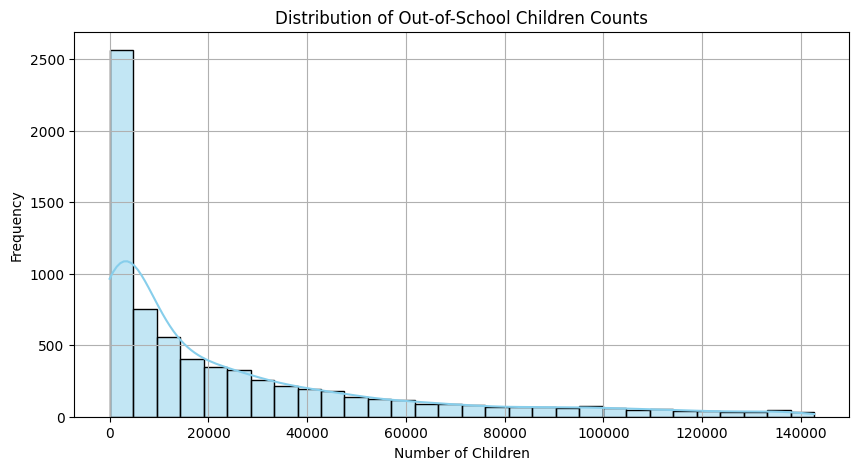

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Observation Value'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Out-of-School Children Counts")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
# Optional: Rename columns to simplify before plotting
df.columns = ['Country', 'Year', 'Sex', 'Age_Group', 'Unit', 'Out_of_School']

# Filter to keep only 'All genders'
df_all = df[df['Sex'] == 'All genders'].copy()

# Drop unnecessary columns
df_all = df_all.drop(columns=['Sex', 'Age_Group', 'Unit'])

# View the structure
df_all.head()

,Country,Year,Out_of_School
3,Albania,2014,7097
4,Albania,2013,7543
9,Albania,2012,7617
11,Albania,2011,14349
15,Albania,2010,20355


In [28]:
countries = ['Rwanda', 'Australia', 'Cyprus']

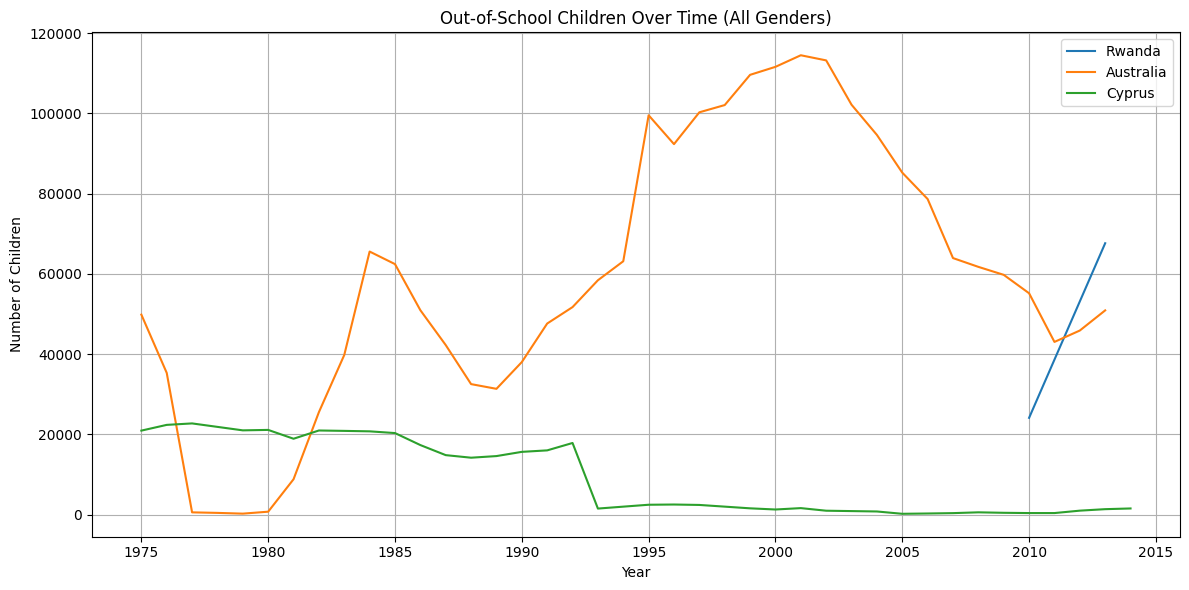

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in countries:
    data = df_all[df_all['Country'] == country]
    plt.plot(data['Year'], data['Out_of_School'], label=country)

plt.title('Out-of-School Children Over Time (All Genders)')
plt.xlabel('Year')
plt.ylabel('Number of Children')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


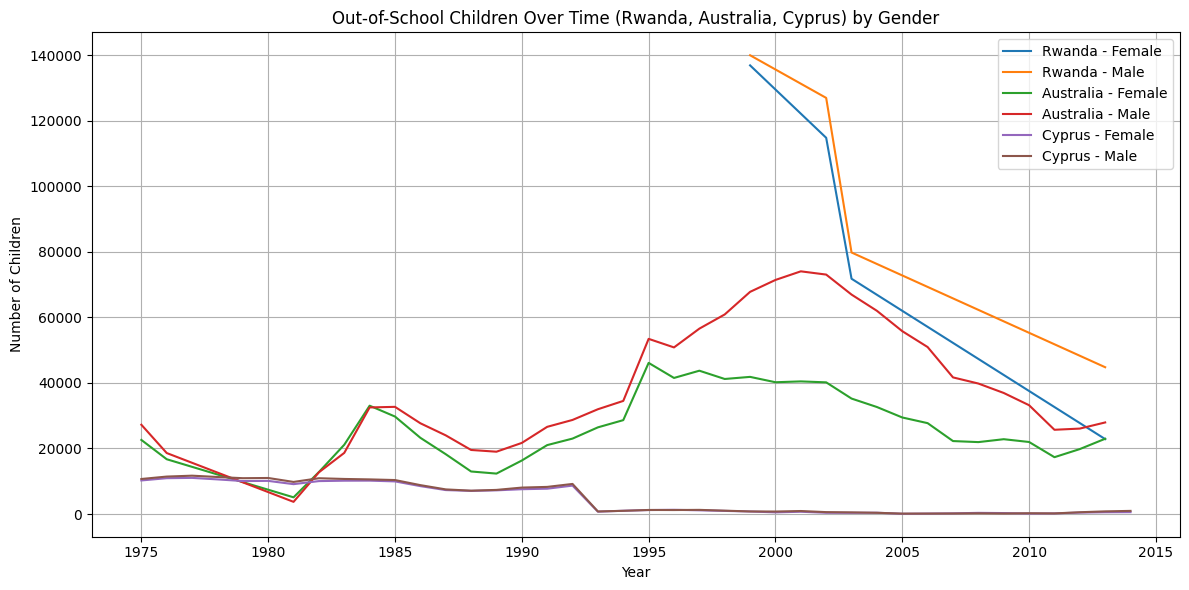

In [36]:
import matplotlib.pyplot as plt

# Filter for Female and Male
df_gender = df[df['Sex'].isin(['Female', 'Male'])].copy()

# Filter for specific countries only
countries = ['Rwanda', 'Australia', 'Cyprus']
df_gender = df_gender[df_gender['Country'].isin(countries)]

# Drop unnecessary columns (optional)
df_gender = df_gender.drop(columns=['Age_Group', 'Unit'], errors='ignore')

# Plot Female and Male trends for selected countries
plt.figure(figsize=(12, 6))

for country in countries:
    for gender in ['Female', 'Male']:
        data = df_gender[(df_gender['Country'] == country) & (df_gender['Sex'] == gender)]
        plt.plot(data['Year'], data['Out_of_School'], label=f"{country} - {gender}")

plt.title('Out-of-School Children Over Time (Rwanda, Australia, Cyprus) by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Children')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


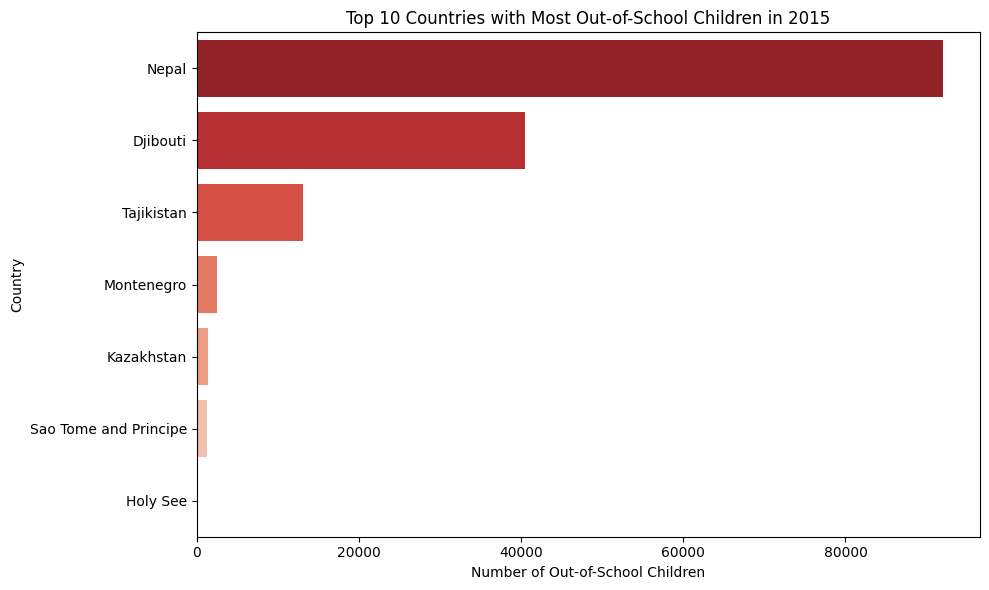

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ranking_top10 is your DataFrame containing the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking_top10,
    x='Out_of_School',
    y='Country',
    hue='Country',6
    palette='Reds_r',
    legend=False  # Hide legend since country names are already on the y-axis
)
plt.title('Top 10 Countries with Most Out-of-School Children in 2015')
plt.xlabel('Number of Out-of-School Children')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [39]:
# Filter for 2015
df_2015 = df_all[df_all['Year'] == 2015]
df_2015 = df_2015.dropna(subset=['Out_of_School'])  # remove missing values if any

In [40]:
print(df_2015[['Country', 'Out_of_School']].head())

         Country  Out_of_School
2372    Djibouti          40493
3644    Holy See              0
4580  Kazakhstan           1401
7684  Montenegro           2516
8023       Nepal          91982


In [43]:
!pip install scikit-learn

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for a specific year (e.g., 2015)
df_2015 = df_all[df_all['Year'] == 2015]

# Drop rows with missing or zero values (if any)
df_2015 = df_2015[df_2015['Out_of_School'] > 0]

# Select relevant columns for clustering
X = df_2015[['Out_of_School']].copy()

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df_2015['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [58]:
df_2015[['Country', 'Out_of_School', 'Cluster']].head(10)


,Country,Out_of_School,Cluster
2372,Djibouti,40493,2
4580,Kazakhstan,1401,1
7684,Montenegro,2516,1
8023,Nepal,91982,0
9540,Sao Tome and Principe,1346,1
10378,Tajikistan,13130,1


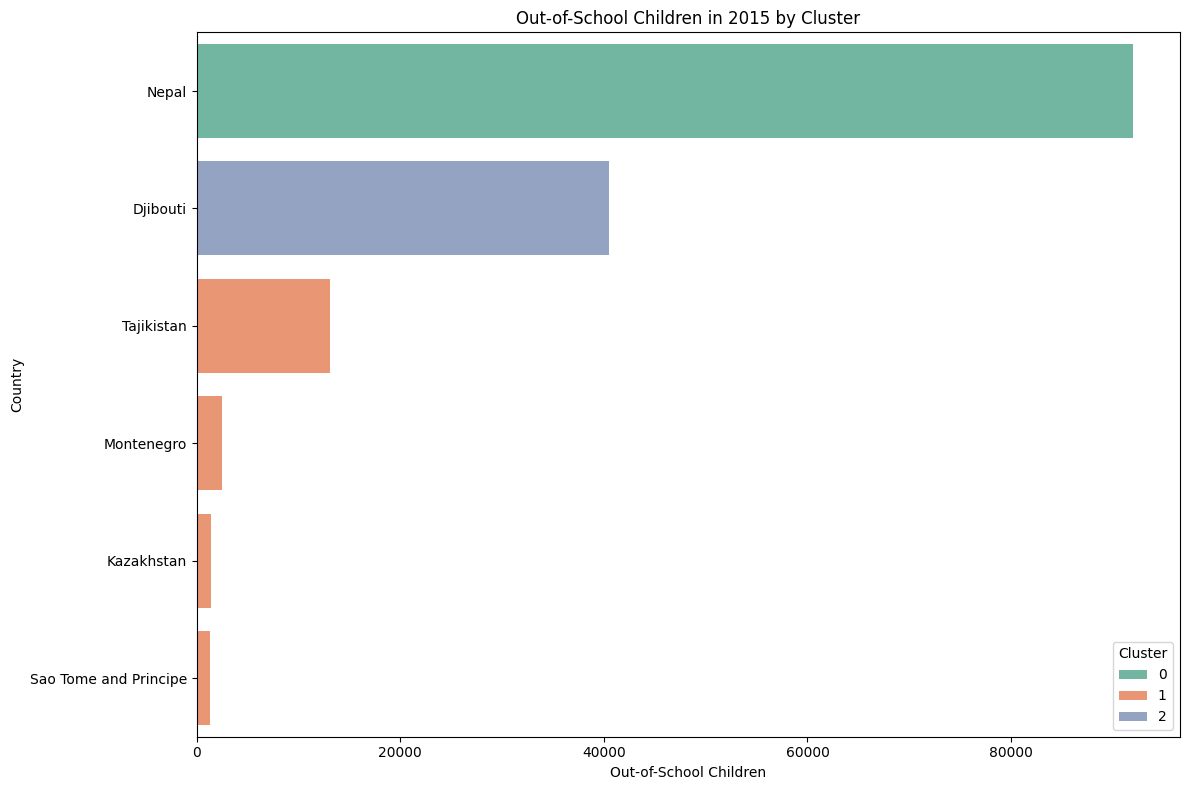

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort countries by number of out-of-school children
df_sorted = df_2015.sort_values('Out_of_School', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_sorted, x='Out_of_School', y='Country', hue='Cluster', dodge=False, palette='Set2')
plt.title('Out-of-School Children in 2015 by Cluster')
plt.xlabel('Out-of-School Children')
plt.ylabel('Country')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [62]:
df_2015['Cluster'].value_counts()

Cluster
0    4
2    1
1    1
Name: count, dtype: int64

In [63]:
import numpy as np

# Get cluster centers on original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} center (approximate number of children): {int(center[0])}")

Cluster 0 center (approximate number of children): 4598
Cluster 1 center (approximate number of children): 91982
Cluster 2 center (approximate number of children): 40493


In [64]:
for i in range(3):
    print(f"\nCluster {i} sample countries:")
    print(df_2015[df_2015['Cluster'] == i][['Country', 'Out_of_School']].head(5))



Cluster 0 sample countries:
                     Country  Out_of_School
4580              Kazakhstan           1401
7684              Montenegro           2516
9540   Sao Tome and Principe           1346
10378             Tajikistan          13130

Cluster 1 sample countries:
     Country  Out_of_School
8023   Nepal          91982

Cluster 2 sample countries:
       Country  Out_of_School
2372  Djibouti          40493


In [65]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df_2015['Cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.542


In [67]:
df_2015.to_csv('out_of_school_clusters_2015.csv', index=False)

In [68]:
import os
print(os.getcwd())

C:\Users\Administrator\OutOfSchool_Project
